# Modeling time series with trend:
Moving average and exponential smoothing method cannot be used for series with trend as they lag behind.
Two m:
1. Linear Regression
2. Holt's method


### Importing libraries

In [68]:
import numpy as np
import matplotlib.pyplot as plt

### Generating time series data with linear trend

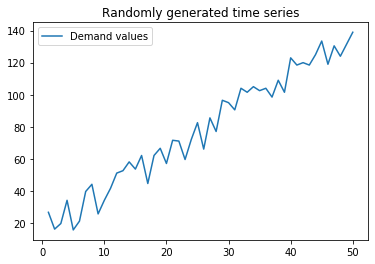

In [69]:
x=np.linspace(1,50,50)
y=np.random.randint(1,25,50)+2.5*x
plt.plot(x,y,label='Demand values')
plt.legend()
plt.title("Randomly generated time series")
plt.show()

## Linear Regression

In [70]:
X=np.array(x).reshape(len(x),1)
Y=np.array(y).reshape(len(y),1)
ones=np.ones(shape=(X.shape[0],1))
theta=np.random.rand(2,1)
X=np.hstack((ones,X))

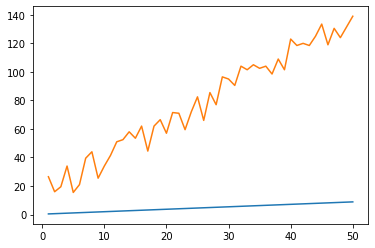

In [71]:
h=X.dot(theta) #Randomly generated slope and intercept
plt.plot(X[:,1],h)
plt.plot(X[:,1],Y)

In [72]:
def linear_regression(X,Y):
    theta_opt=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return theta_opt

In [73]:
theta_opt=linear_regression(X,Y)
h=X.dot(theta_opt)

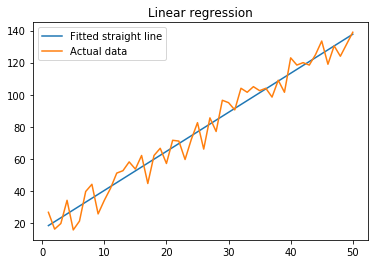

In [74]:
plt.plot(X[:,1],h,label='Fitted straight line')
plt.plot(X[:,1],Y,label='Actual data')
plt.legend()
plt.title(label="Linear regression")
plt.show()

### Evaluating model using MAD, MSE and MAPE

In [75]:
MAD=np.mean(np.abs(y-h))
MSE=np.mean(np.abs(y-h)**2)
MAPE=np.mean(np.abs(y-h)/y)*100
print('Evaluation metric values for Linear regression are-')
print('Mean Absolute deviation is',MAD)
print('Mean Squared Error is',MSE)
print('Mean Absolute Percentage Error is',MAPE)

Evaluation metric values for Linear regression are-
Mean Absolute deviation is 41.05274829291715
Mean Squared Error is 2527.8177001200465
Mean Absolute Percentage Error is 81.29897207003735


## Double exponential smoothing using Holt's method

To solve initialization problem i'll use first 10 observation values as baseline data and fit a linear regression model in it, afterward i'll apply double exponential smoothing(for intercept and slope) for further forecast using holt's method

In [76]:
def holts_method(X,y,alpha,beta):
    #Initial values for Intercept S_t and slope G_t
    S_0,G_0=list(linear_regression(X[:10],y[:10]))
    S_t1=S_0
    G_t1=G_0
    F_t=[]
    for i in x[:10]:
        F_t.append(S_0+G_0*i)
    for i in range(10,len(x)):
        S_t=alpha*y[i]+(1-alpha)*(S_t1+G_t1)
        G_t=beta*(S_t-S_t1)+(1-beta)*G_t1
        S_t1=S_t
        G_t1=G_t
        F_t.append(S_t+G_t)
    ###Plotting data using holt's method
    #ho=list(S_t+G_t*np.array(x[20:]))
    plt.plot(x,F_t,label='Holt\'s method')
    plt.plot(X[:,1],h,label='Linear Regression')
    plt.plot(x,y,label='Actual data')
    plt.title('Holt\'s method for alpha='+str(alpha)+', beta='+str(beta))
    plt.legend()
    plt.show()

    #Evaluation metrics Holt's method
    MAD1=np.mean(np.abs(y-F_t))
    MSE1=np.mean(np.abs(y-F_t)**2)
    MAPE1=np.mean(np.abs(y-F_t)/y)*100
    print('Evaluation metric values for Holt\'s method are-')
    print('Mean Absolute deviation is',MAD1)
    print('Mean Squared Error is',MSE1)
    print('Mean Absolute Percentage Error is',MAPE1)

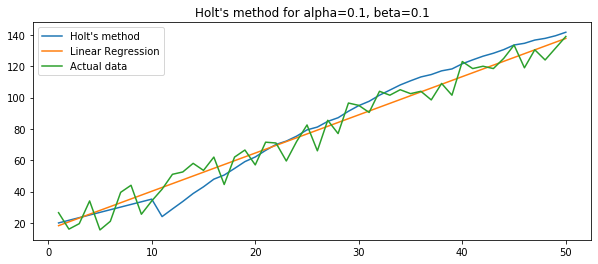

Evaluation metric values for Holt's method are-
Mean Absolute deviation is 8.170706427896665
Mean Squared Error is 96.065916013454
Mean Absolute Percentage Error is 15.148533943849559


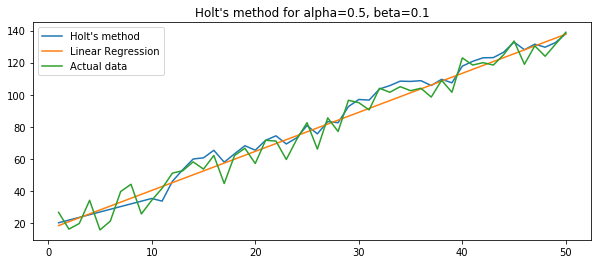

Evaluation metric values for Holt's method are-
Mean Absolute deviation is 4.741213066993554
Mean Squared Error is 34.08863934613214
Mean Absolute Percentage Error is 10.452355424344024


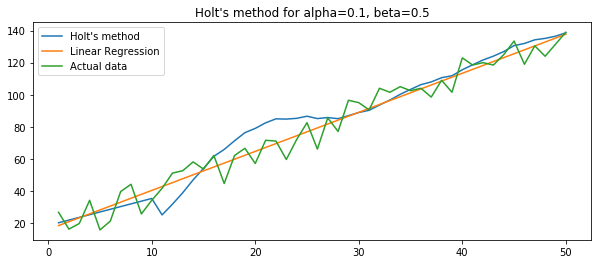

Evaluation metric values for Holt's method are-
Mean Absolute deviation is 8.126695031749096
Mean Squared Error is 104.51987432377679
Mean Absolute Percentage Error is 15.674930117269929


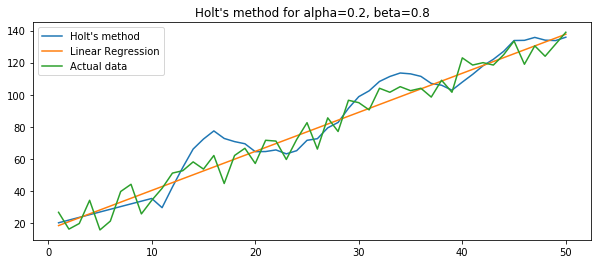

Evaluation metric values for Holt's method are-
Mean Absolute deviation is 7.553464168487414
Mean Squared Error is 82.16023339243314
Mean Absolute Percentage Error is 14.32069208234901


In [77]:
plt.figure(figsize=(10,4))
holts_method(X,y,.1,.1)
plt.figure(figsize=(10,4))
holts_method(X,y,.5,.1)
plt.figure(figsize=(10,4))
holts_method(X,y,.1,.5)
plt.figure(figsize=(10,4))
holts_method(X,y,.2,.8)

## Conclusion

As can be seen Holt's method outperform linear regression for certain values of $\alpha$ greater than $\beta$